# Imports

In [7]:
!pip install pyarrow

In [8]:
!pip install awkward
!pip install hist
!pip install matplotlib


In [9]:

import numpy as np
import pandas as pd
import awkward as ak

import hist
from hist import Hist, axis

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Setup plotting

In [10]:
plt.rcParams['figure.figsize'] = [10, 8]
font = {'weight' : 'normal','size'   : 22}
plt.rc('font', **font)

# Get data

### Read data from a csv file into a dataframe

I'm reading in the data using this method because I think it's familiar to you. Every row of the dataframe is a different event with a single S2. The times and samples arrays contain the x-axis and y-axis values of the S2 waveforms. I was not able to access these arrays using this method.

In [11]:
data_path = 'padded_waveforms.csv'
df = pd.read_csv(data_path)#,dtype={'times':object})
df.head()

,Unnamed: 0,runID,eventID,times,samples,length,area,max_pulse_height,ext_elec,x,y,r,S2_width,label,type,weights_no_gas,chonkers
0,0,6940,3177,[-3632. -3622. -3612. ... 7348. 7358. 7368.],[ 0.00036997 -0.00035192 -0.00072389 ... -0.00...,1101,9605.476563,2.721810,204.067911,42.940289,28.632875,51.611142,11120,0,cathode,0.066667,[0. 0. 0. ... 0. 0. 0.]
1,1,6940,7831,[-3.642e+03 -3.632e+03 -3.622e+03 -3.612e+03 -...,[ 9.63137893e-04 9.63137893e-04 5.87922696e-...,932,8454.574219,2.998639,179.617043,-10.792992,-21.832264,24.354392,8570,0,cathode,0.076923,[0. 0. 0. ... 0. 0. 0.]
2,2,6940,9904,[-1.312e+03 -1.302e+03 -1.292e+03 -1.282e+03 -...,[-3.67614999e-03 -4.67493851e-03 -2.94444035e-...,525,10806.775390,7.274445,229.589450,45.577667,18.305967,49.116516,3760,1,gate,0.066667,[0. 0. 0. ... 0. 0. 0.]
3,3,6940,15136,[-8.230e+02 -8.130e+02 -8.030e+02 -7.930e+02 -...,[-4.52316692e-03 2.69214716e-03 -1.25800464e-...,640,11460.135740,8.490430,243.470060,28.943817,44.150917,52.792500,2810,1,gate,0.066667,[0. 0. 0. ... 0. 0. 0.]
4,4,6940,16478,[-8.130e+02 -8.030e+02 -7.930e+02 -7.830e+02 -...,[-9.62501578e-03 -4.18262882e-03 -1.14743756e-...,656,11764.575200,8.766376,249.937863,-22.589451,23.071259,32.288795,5630,1,gate,0.041667,[0. 0. 0. ... 0. 0. 0.]


### Read data from a parquet file into an awkward array

This is another method of reading in the data using a package from the Scikit HEP library. Awkward arrays work very similarly to numpy arrays but they can have different lengths – for example, the times and samples arrays are a different length for every event. You can apply most numpy operations to them. I've shown some equivilent awkward and numpy operations below.

In [12]:
import os
print(os.path.exists('padded_waveforms.parquet'))


True


In [13]:
data_path = 'padded_waveforms.parquet'
arr = ak.from_parquet(data_path)
ak.fields(arr)

['runID',
 'eventID',
 'times',
 'samples',
 'length',
 'area',
 'max_pulse_height',
 'ext_elec',
 'x',
 'y',
 'r',
 'S2_width',
 'label',
 'type',
 'weights_no_gas',
 'chonkers']

In [14]:
ak.count(arr.samples,axis=1)[:10], np.sum(arr.samples == arr.samples,axis=1)[:10]

(<Array [1101, 932, 525, 640, 656, ..., 635, 829, 356, 1236] type='10 * int64'>,
 <Array [1101, 932, 525, 640, 656, ..., 635, 829, 356, 1236] type='10 * int32'>)

# Plots

In [15]:
gate_events = arr[(arr.label == 1)]
tritium_events = arr[(arr.label == 2)]
cathode_events = arr[(arr.label == 0)]


In [16]:
print(ak.fields(gate_events))
print(ak.fields(tritium_events))
print(ak.fields(cathode_events))



['runID', 'eventID', 'times', 'samples', 'length', 'area', 'max_pulse_height', 'ext_elec', 'x', 'y', 'r', 'S2_width', 'label', 'type', 'weights_no_gas', 'chonkers']
['runID', 'eventID', 'times', 'samples', 'length', 'area', 'max_pulse_height', 'ext_elec', 'x', 'y', 'r', 'S2_width', 'label', 'type', 'weights_no_gas', 'chonkers']
['runID', 'eventID', 'times', 'samples', 'length', 'area', 'max_pulse_height', 'ext_elec', 'x', 'y', 'r', 'S2_width', 'label', 'type', 'weights_no_gas', 'chonkers']


[Text(0.5, 0, 'Time [ns]')]

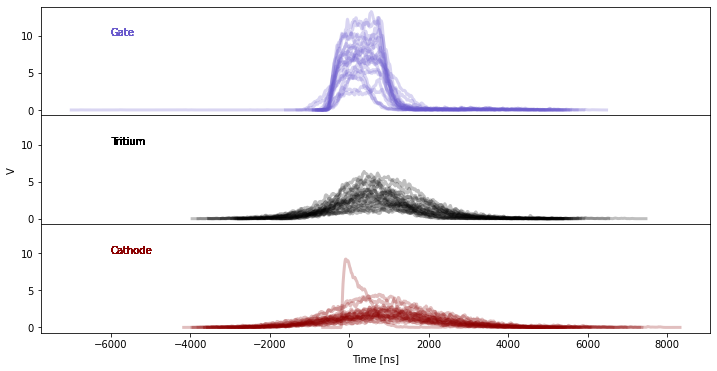

In [17]:
#MY CODE NOT GIVEN CODE

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 6), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.0)

# Plot gate events
for ii in range(20):
    times = ak.to_numpy(gate_events.times[ii])  # Convert to numpy array
    samples = ak.to_numpy(gate_events.samples[ii])  # Convert to numpy array
    ax[0].plot(times, samples, color='slateblue', alpha=0.25, lw=3)
    ax[0].text(-6000, 10, 'Gate', color='slateblue')

# Plot tritium events
for ii in range(20):
    times = ak.to_numpy(tritium_events.times[ii])
    samples = ak.to_numpy(tritium_events.samples[ii])
    ax[1].plot(times, samples, color='black', alpha=0.25, lw=3)
    ax[1].text(-6000, 10, 'Tritium', color='black')

# Plot cathode events
for ii in range(20):
    times = ak.to_numpy(cathode_events.times[ii])
    samples = ak.to_numpy(cathode_events.samples[ii])
    ax[2].plot(times, samples, color='darkred', alpha=0.25, lw=3)
    ax[2].text(-6000, 10, 'Cathode', color='darkred')

# Axis labels
ax[1].set(ylabel='V')
ax[2].set(xlabel='Time [ns]')

[Text(0.5, 0, 'Time [ns]')]

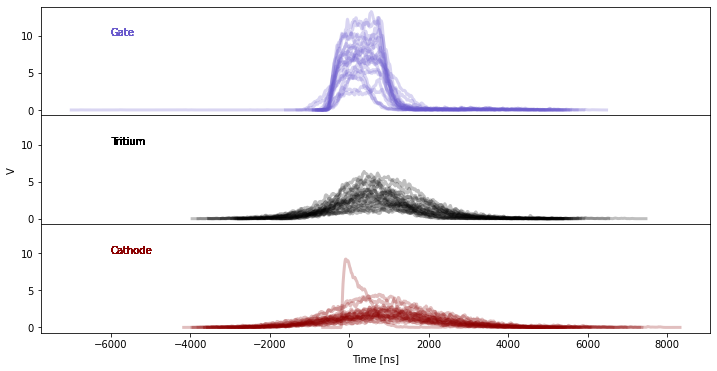

In [18]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(12,6),sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.0)
    
gate_events = arr[(arr.label == 1)]
for ii in range(20):
    ax[0].plot(gate_events[ii].times,gate_events[ii].samples,color='slateblue',alpha=0.25,lw=3)
    ax[0].text(-6000,10,'Gate',color='slateblue')
    
tritium_events = arr[(arr.label == 2)]
for ii in range(20):
    ax[1].plot(tritium_events[ii].times,tritium_events[ii].samples,color='black',alpha=0.25,lw=3)
    ax[1].text(-6000,10,'Tritium',color='black')
    
cathode_events = arr[(arr.label == 0)]
for ii in range(20):
    ax[2].plot(cathode_events[ii].times,cathode_events[ii].samples,color='darkred',alpha=0.25,lw=3)
    ax[2].text(-6000,10,'Cathode',color='darkred')
    
ax[1].set(ylabel='V')
ax[2].set(xlabel='Time [ns]')

C:\Users\44738\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


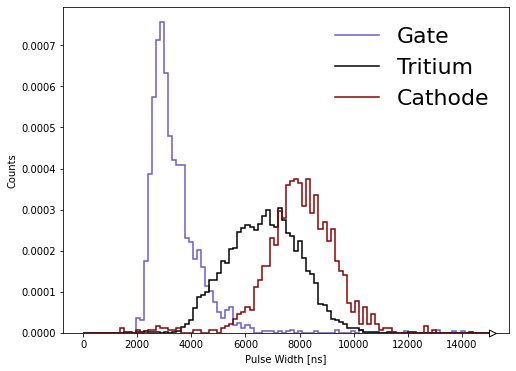

In [19]:
!pip install mplhep
!pip install "hist[plot]"

fig, ax = plt.subplots(figsize=(8,6))

gate_events = arr[(arr.label == 1)]
gate_hist = Hist(hist.axis.Regular(100,0,15000,label='S2 width'))
gate_hist.fill(gate_events.S2_width)
gate_hist.plot(color='slateblue',density=True,yerr=False,label='Gate')

tritium_events = arr[(arr.label == 2)]
tritium_histo = Hist(hist.axis.Regular(100,0,15000,label='S2 width'))
tritium_histo.fill(tritium_events.S2_width)
tritium_histo.plot(color='black',density=True,yerr=False,label='Tritium')

cathode_events = arr[(arr.label == 0)]
cathode_histo = Hist(hist.axis.Regular(100,0,15000,label='S2 width'))
cathode_histo.fill(cathode_events.S2_width)
cathode_histo.plot(color='darkred',density=True,yerr=False,label='Cathode')
    
ax.set(xlabel='Pulse Width [ns]',ylabel='Counts')
ax.legend(bbox_to_anchor=(1,1),loc='upper right',frameon=False,fontsize=22) 